<h3>Trading y los Costos de Trading (1)</h3>
anteriormente se habló que las estrategias simples de momentum y contraria conducen a excesivas operaciones de trading y altos costos debido a las numerosas transacciones que hay que realizar. Luego, se hace necesario analizar y probar estos costos asociados porque se puede dar el caso que una estrategia sea rentable antes de tomar en cuenta los costos y no producir ganancias después de tomarlos en cuenta.

Entonces el plan para esta y la próxima lección, es tomar en cuenta los costos del trading.  

Para empezar importaremos los datos de interés:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col ="time")

In [3]:
window = 3

In [4]:
data["returns"] = np.log(data.div(data.shift(1)))

In [5]:
data["position"] = -np.sign(data["returns"].rolling(window).mean())

In [6]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [7]:
data

,price,returns,position,strategy
time,,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


In [8]:
data.dropna(inplace=True)

In [9]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)


In [10]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


Al analizar la tabla anterior se puede destacar que después de 2 años (2018 - 2020), la estrategia de Buy&Hold produce una rentabilidad de 0.929 (pérdida) y la estrategia contraria 1.101.  
En la columna central se observan las posiciones que se van tomando con esta estrategia.  

La mejor forma de analizar esto es mediante una gráfica de la columna posición:

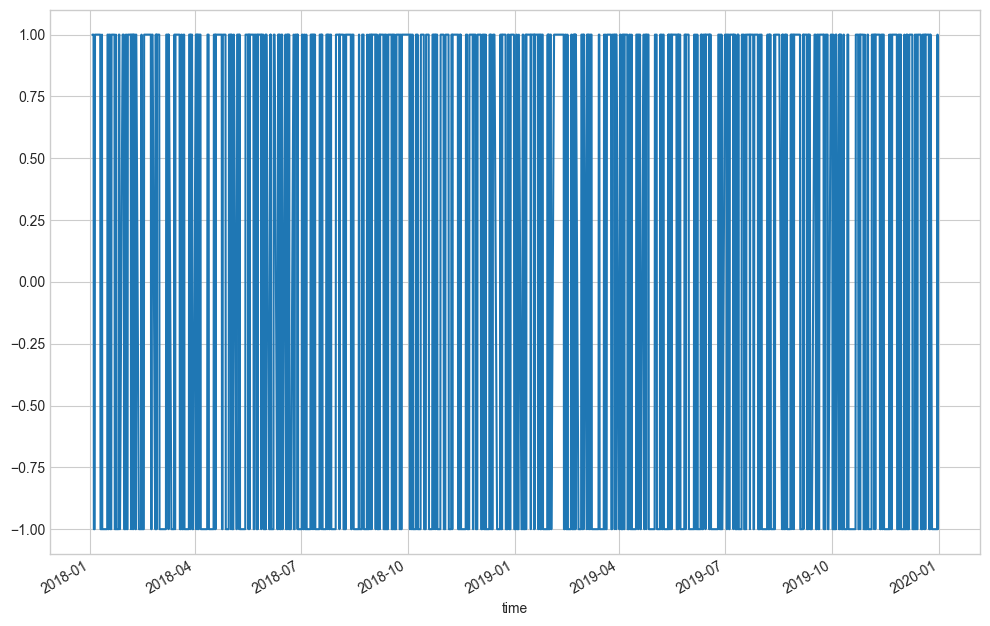

In [11]:
data.loc[:, "position"].plot(figsize = (12, 8))
plt.show()

Aquí se pueden ver los cambios de posición entre -1 y +1. Claramente se observan una gran cantidad de cambios de posición y consecuentemente de trades por lo que se hace difícil contar el número de trades. Para mejorar la visiualización incrementamos la granularidad, por ejemplo, graficando un mes (06-2019):

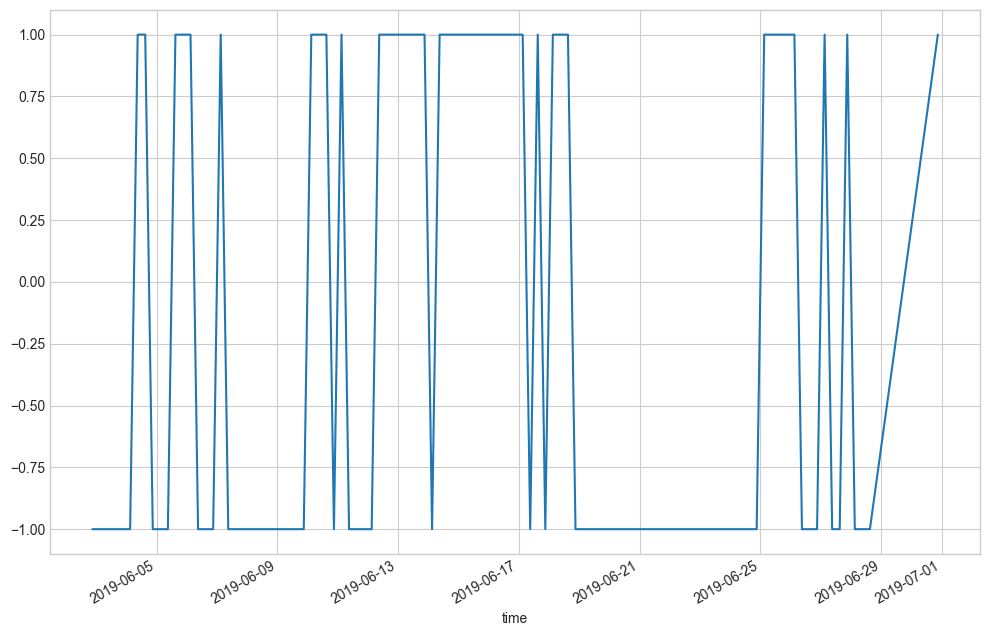

In [12]:
data.loc["2019-06", "position"].plot(figsize = (12, 8))
plt.show()

En la gráfica anterior se observan alrededor de 20 trades en un mes tener en cuenta que todos estos trades disparan los costos y cuando estamos trabajando con brokers como OANDA o FXCM hay que pagar el "ask spread" de nuestras ofertas. El "ask spread" es el diferencial de oferta o sea la diferencia entre el precio de oferta (ask price) del activo y el precio de compra final (bid price)  
El próximo paso consiste en estimar estos costos de transacción por trade lo cual es una visión simplificada en tanto que el backtesting vectorizado está claramente limitado cuando hay que tomar en cuenta y simular los costos de las transacciones.

En las siguientes líneas de código se harán unas priemras estimaciones simplificadas de los costos de trading.

In [13]:
spread = 1.5 * 0.0001 #pips cuarto decimal del precio
spread

0.00015000000000000001

In [14]:
half_spread = spread/2 # costo de transacción absoluto por trade (cambio de posición +-1)
half_spread

7.500000000000001e-05

Se ha definido la variable spread. para cuantificar en "pips" el aumento del costo de una transacción o trade, la cual se ha estimado en 1.5 pips. Recordar que los pips corresponden al cuarto decimal del precio.  

Por ejemplo, al comprar o vender un euro tenemos que pagar 0.00015 dólares. Más claramente si se compran (o se venden) 100000 euros tenemos que pagar 15 dólares por la transacción (esto corresponde precisamente al ask spread) 

Ahora bien, típicamente en un trade cambiamos de posición en +1 o en -1. Por ejemplo, si empezamos en una posición neutra y asumimos una posición larga esto corresponde a un trade; y si estamos en posición neutra y asumimos corto esto es otro trade, de tal manera que en un trade se paga la mitad del spread.  

Ahora lo que falta calcular el costo proporcional de la transacción por trade generado por el cambio de la posición en +1 o en -1. Para esto es necesario dividir el costo total absoluto (el half spread) entre el precio promedio:


In [15]:
ptc = half_spread/ data.price.mean()
ptc

np.float64(6.520065892008921e-05)

In [16]:
#redondeando el ptc
ptc = 0.00007

In [17]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


El próximo paso consiste en definir y calcular el número de trades por cada período. Para esto seleccionamos la columna posición y calculamos la diferencia, entre el valor de la posición del último y el valor de la posición en el período actual.

En la tabla anterior para el día 2019-12-30 entre las horas 10:00:00+00:00 y 16:00:00+00:00 se puede ver en la columna position una transición de corto a largo (-1 a +1). 

In [18]:
data.position.diff()

time
2018-01-02 22:00:00+00:00    NaN
2018-01-03 04:00:00+00:00    0.0
2018-01-03 10:00:00+00:00    0.0
2018-01-03 16:00:00+00:00    0.0
2018-01-03 22:00:00+00:00    0.0
                            ... 
2019-12-29 22:00:00+00:00    0.0
2019-12-30 04:00:00+00:00    0.0
2019-12-30 10:00:00+00:00    0.0
2019-12-30 16:00:00+00:00    2.0
2019-12-30 22:00:00+00:00   -2.0
Name: position, Length: 2066, dtype: float64

Habiendo calculado la diferencia entre las posiciones para 2 períodos consecutivos, se puede observar en la tabla anterior que la diferencia de las posiciones del día 2019-12-30 corresponde a 2 trades y su costo sería de 2 veces el half spread y corresponde a un cambio de posición de corto a largo. Entonces, el cambio de posición de - a + realmente corresponde a 2 trades y cuesta 2 veces el half spread.  

Igualmente, en los últimos dos períodos de la tabla (2019-12-30 16:00:00+00:00 y 2019-12-30 22:00:00+00:00) se observan 2 trades que esta vez corresponden un cambio de posición de +1 a -1 (cambio de posición de largo a corto)

A continuación vamos a llenar con ceros los valores que faltan y tomar el valor absoluto, porque el objetivo es contar el número de trades y esto no depende del signo. 

In [19]:
data.position.diff().fillna(0).abs()

time
2018-01-02 22:00:00+00:00    0.0
2018-01-03 04:00:00+00:00    0.0
2018-01-03 10:00:00+00:00    0.0
2018-01-03 16:00:00+00:00    0.0
2018-01-03 22:00:00+00:00    0.0
                            ... 
2019-12-29 22:00:00+00:00    0.0
2019-12-30 04:00:00+00:00    0.0
2019-12-30 10:00:00+00:00    0.0
2019-12-30 16:00:00+00:00    2.0
2019-12-30 22:00:00+00:00    2.0
Name: position, Length: 2066, dtype: float64

Lo que sigue es crear una nueva columna (trades) con el número de trades por período para luego contar los trades completos:

In [20]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,returns,position,strategy,creturns,cstrategy,trades
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420,0.0


In [21]:
data.trades.value_counts()

trades
0.0    1513
2.0     553
Name: count, dtype: int64

En las tablas anteriores se observan 2066 períodos de las cuales 1513 no presentan trades (no hubo cambios de posición) y en 553 presentan cambios totales de posición de 2 trades., lo cual implica qwue la estrategia contraria conduce a una cantidad excesiva de trades. En la próxima lección se calculará el impacto de esto en la realización absoluta y en la rentabilidad superior. 
